In [20]:
import numpy as np
import matplotlib.pyplot as plt
def conduccion_1d(k,s,L,TA,TB,N):
    """
    Parameters 
    ----------
    L:float 
    L es la longitud del dominio 
    
    K:float 
    es la conductividad del material 
    
    S:float 
    es la fuente 
    
    TA:float 
    es la condición de frontera a la izquierda 
    
    TB:float 
    Es la condición de frontera a la derecha
    
    N:int 
    es el número de nodos internos (gradps de libertad)
    
    Return
    ------
    Al final esta función dibujó la solución.
    """
    #escribir los párametros físicos 
#    L=5.0
#    K=0.02
#    S=1.0
#    TA=200
#   TB=1000

#    N=4
    h= L/(N+1) 
    #parametros numericos 
    #definimos los vectores b y la matriz A
    T=np.zeros(N+2)
    b=np.zeros(N)
    A=np.zeros((N,N))
    r= k/h**2
    b[:]= s/r      # los : indican un rango 
    T[0]= TA
    T[-1]= TB
    b[0]+= TA
    b[-1]+= TB
    b
    A[0,0]=2
    A[0,1]=-1
    #la i es la que se va modificando 
    for i in range (1,N-1):
        A[i,i]=2
        A[i,i+1]=-1
        A[i,i-1]=-1
    A[-1,-2]=-1
    A[-1,-1]=2
    A
    #para resolver el código lineal 
    T[1:N+1] = np.linalg.solve(A,b)
    T
    plt.plot(T,"o-")

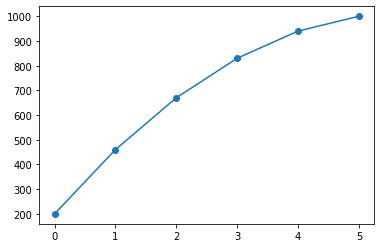

In [21]:
conduccion_1d(0.02, 1.0, 5.0, 200, 1000, 4)

In [22]:
import ipywidgets as widgets

In [23]:
w = widgets.interactive(conduccion_1d,
                       k = widgets.fixed(0.02),
                       s = widgets.FloatSlider(max=1.0, min=0.0, value=0, step=0.2),
                       L = widgets.fixed(5.0),
                       TA = widgets.fixed(200),
                       TB = widgets.fixed(1000),
                       N = widgets.IntSlider(max=10, min=4, value=4))

In [24]:
display(w)

interactive(children=(FloatSlider(value=0.0, description='s', max=1.0, step=0.2), IntSlider(value=4, descripti…